In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/ignis/Documents/scores.csv")

In [3]:
df

,A,B
0,1,77
1,2,64
2,3,89
3,4,11
4,5,34


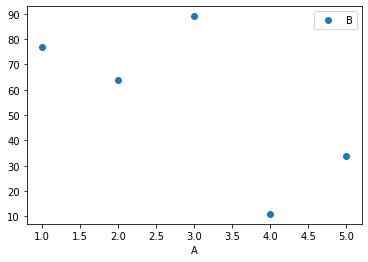

In [6]:
df.plot(x="A", y="B", style="o")
plt.show()

In [7]:
x_mean = df["A"].mean()
y_mean = df["B"].mean()
print(x_mean, y_mean)

3.0 55.0


In [8]:
df["x"] = df["A"] - x_mean
df["y"] = df["B"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,A,B,x,y,x*y,x^2,y^2
0,1,77,-2.0,22.0,-44.0,4.0,484.0
1,2,64,-1.0,9.0,-9.0,1.0,81.0
2,3,89,0.0,34.0,0.0,0.0,1156.0
3,4,11,1.0,-44.0,-44.0,1.0,1936.0
4,5,34,2.0,-21.0,-42.0,4.0,441.0


In [9]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


-139.0 10.0 4098.0


In [10]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

-0.6866395631641784

In [11]:

def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [12]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [13]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

1.4142135623730951 28.628656971642943


In [14]:
m = correlation * (std_deviation_y / std_deviation_x)
m

-13.899999999999999

In [18]:
c = df["B"].mean() - m * df["A"].mean()
c


96.69999999999999

In [19]:
df["y_prediction"] = m * df["A"] + c
df

,A,B,x,y,x*y,x^2,y^2,y_prediction
0,1,77,-2.0,22.0,-44.0,4.0,484.0,82.8
1,2,64,-1.0,9.0,-9.0,1.0,81.0,68.9
2,3,89,0.0,34.0,0.0,0.0,1156.0,55.0
3,4,11,1.0,-44.0,-44.0,1.0,1936.0,41.1
4,5,34,2.0,-21.0,-42.0,4.0,441.0,27.2


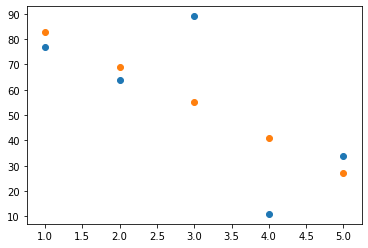

In [20]:
plot1 = plt.scatter(df["A"], df["B"])
plot2 = plt.scatter(df["A"], df["y_prediction"])
plt.show()